### Some helper functions:

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import os.path
import matplotlib.pyplot as plt
import matplotlib

def prepare(f):
    df = pd.read_csv(f, comment='#')
    try:
        datetimes = pd.to_datetime(df["DATE_TIME"])
        df["DATE_TIME"] = datetimes
    except KeyError:
        df.rename(columns={"START_DATE": "DATE_TIME"}, inplace=True)
        datetimes = pd.to_datetime(df["DATE_TIME"])
        df["DATE_TIME"] = datetimes
    df.info()
    # df = df.loc[df["DATE_TIME"].dt.year > 1966]
    # df = df.loc[df["DATE_TIME"].dt.year <= 1966]
    # print(df)
    return df


def calc_intra_annual(df, mean_col, max_col, min_col):
    mean_list = []
    std_list = []
    max_list = []
    min_list = []

    for d in range(1, 366):
        # print(d)
        mask = ((df["DATE_TIME"].dt.dayofyear == d) & (~df["DATE_TIME"].dt.is_leap_year)) | (
                    (df["DATE_TIME"].dt.dayofyear == d + 1) & (df["DATE_TIME"].dt.dayofyear > 59) & df[
                "DATE_TIME"].dt.is_leap_year) | (
                           (df["DATE_TIME"].dt.dayofyear == d) & (df["DATE_TIME"].dt.dayofyear <= 59) & df[
                       "DATE_TIME"].dt.is_leap_year)
        day_df = df.loc[mask]
        # print(day_df)

        mean = day_df[mean_col].mean()
        mean_list.append(mean)

        std = day_df[mean_col].std()
        std_list.append(std)

        max_list.append(day_df[max_col].max())
        min_list.append(day_df[min_col].min())

    day_list = [x for x in range(1, 366)]
    # print(len(day_list))
    # print(len(mean_list))
    # print(len(std_list))
    upper_list = [sum(x) for x in zip(mean_list, std_list)]
    lower_list = [x[0] - x[1] for x in zip(mean_list, std_list)]

    return day_list, mean_list, upper_list, lower_list, max_list, min_list


def set_plt():
    cm = 1 / 2.54  # centimeters in inches
    plt.figure(figsize=(8.5, 5.5), dpi=80)
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()


def plot(day_list, mean_list, upper_list=None, lower_list=None, max_list=None, min_list=None, ylim=(-47, +40), ylabel=None, title=None):
    # plt.figure(figsize=(8, 4), dpi=80)
    set_plt()

    plt.plot(day_list, mean_list, color="k")
    """
    if upper_list is not None:
        plt.plot(day_list, upper_list, color="grey")
    if lower_list is not None:
        plt.plot(day_list, lower_list, color="grey")
    """
    plt.fill_between(day_list, upper_list, lower_list, color="lightgrey")
    if max_list is not None:
        # plt.plot(day_list, max_list, color="r")
        plt.plot(day_list, max_list, color="grey")
    if min_list is not None:
        # plt.plot(day_list, min_list, color="r")
        plt.plot(day_list, min_list, color="grey")

    plt.ylim(ylim)
    if ylabel is None:
        ylabel = "Air temperature, degree Celsius"
    plt.ylabel(ylabel)
    plt.xlabel("Day of year")
    # months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '']
    # plt.xticks(np.linspace(0, 365, 13), months)

    plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

    if title is not None:
        plt.title(title)

    plt.show()


def bar(day_list, mean_list, upper_list=None, lower_list=None, max_list=None, min_list=None, ylim=(-40, +40), ylabel=None):
    # plt.figure(figsize=(8, 4), dpi=80)
    set_plt()

    if max_list is not None:
        plt.bar(day_list, max_list, color="lightgrey", width=1)
    if upper_list is not None:
        plt.bar(day_list, upper_list, color="lightgrey", width=1)
    plt.bar(day_list, mean_list, color="k", width=1)
    if lower_list is not None:
        plt.bar(day_list, lower_list, color="grey", width=1)
    if min_list is not None:
        plt.bar(day_list, min_list, color="lightgrey", width=1)

    plt.ylim(ylim)
    if ylabel is None:
        ylabel = "Air temperature, degree Celsius"
    plt.ylabel(ylabel)
    plt.xlabel("Day of year")

    plt.show()

### General font settings:

In [2]:
LEAST_SIZE = 7
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=LEAST_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Input and output directories:

In [3]:
work_dir = "/home/antonv/data/essd/PREP/READY_V2/"

# fig_dir = os.path.dirname(os.path.realpath(__file__))  # __file__ is undefined in Jupyter Notebook
fig_dir = os.path.join(globals()['_dh'][0], "fig")
# print(fig_dir)

### Air temperature:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25202 entries, 0 to 25201
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE_TIME       25202 non-null  datetime64[ns]
 1   MEAN_AIR_TEMP   25169 non-null  float64       
 2   MAX_AIR_TEMP    25169 non-null  float64       
 3   MIN_AIR_TEMP    25137 non-null  float64       
 4   SNOW_THICKNESS  12548 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 984.6 KB


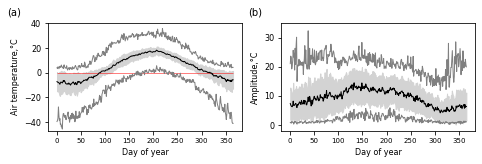

In [4]:
files = ("meteo_daily_1952-2020_1.csv", )

for f in files:
    
    df = prepare(os.path.join(work_dir, f))
    df = df.loc[df["DATE_TIME"].dt.year > 1966]  # observation timetable was changed starting from 1967
    df["DAILY_AMPL"] = df["MAX_AIR_TEMP"] - df["MIN_AIR_TEMP"]
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(17 / 2.54, 6 / 2.54)
    # fig.suptitle('Horizontally stacked subplots')

    day_list, mean_list, upper_list, lower_list, max_list, min_list = calc_intra_annual(df, "MEAN_AIR_TEMP",
                                                                                            "MAX_AIR_TEMP",
                                                                                            "MIN_AIR_TEMP")
    
    ax1.plot(day_list, mean_list, color="k", linewidth=1)
    ax1.fill_between(day_list, upper_list, lower_list, color="lightgrey")
    ax1.plot(day_list, max_list, color="grey", linewidth=1)
    ax1.plot(day_list, min_list, color="grey", linewidth=1)
    ax1.hlines(y=0, xmin=1, xmax=365, linewidth=0.5, color='r')
    ax1.set_ylim([-47, +40])
    ax1.set_xlabel("Day of year")
    ax1.set_ylabel("Air temperature,°C")
    ax1.text(-0.14, 1.15, "(a)", transform=ax1.transAxes, fontsize=MEDIUM_SIZE, va='top', ha='right')
    


    day_list, mean_list, upper_list, lower_list, max_list, min_list = calc_intra_annual(df, "DAILY_AMPL",
                                                                                            "DAILY_AMPL",
                                                                                            "DAILY_AMPL")
    ax2.plot(day_list, mean_list, color="k", linewidth=1)
    ax2.fill_between(day_list, upper_list, lower_list, color="lightgrey")
    ax2.plot(day_list, max_list, color="grey", linewidth=1)
    ax2.plot(day_list, min_list, color="grey", linewidth=1)
    ax2.set_ylim([-2, +35])
    
    ax2.set_xlabel("Day of year")
    ax2.set_ylabel("Amplitude,°C")
    ax2.text(-0.1, 1.15, "(b)", transform=ax2.transAxes, fontsize=MEDIUM_SIZE, va='top', ha='right')
    
    fig.tight_layout()
    
    plt.savefig("test_01.png", dpi=300, transparent=False, facecolor="white")



### Precipitation:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62674 entries, 0 to 62673
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE_TIME      62674 non-null  datetime64[ns]
 1   GAUGE_NO       62673 non-null  float64       
 2   PRECIPITATION  35740 non-null  float64       
 3   SOLID          30111 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.9 MB


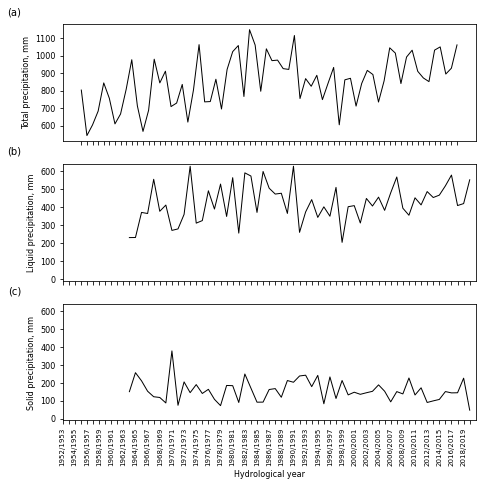

In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

f = "precipitation_daily_1952-2020.csv"

tmp = prepare(os.path.join(work_dir, f))
tmp.set_index("DATE_TIME", inplace=True)
df = tmp.loc[tmp["GAUGE_NO"] == 1]

df["P_TOTAL"] = df["PRECIPITATION"].shift(3)
df["P_LIQUID"] = np.where(df["SOLID"] == 0, df["PRECIPITATION"].shift(3), np.nan)
df["P_SOLID"] = np.where(df["SOLID"] == 1, df["PRECIPITATION"].shift(3), np.nan)
# print(df)
df = df.resample('M').sum()
# print(df)
df = df.resample('Y').sum()
df["HYDRO_YEAR"] = (df.index.year - 1).astype(str) + "/" + df.index.year.astype(str)
df = df.iloc[1:]  # since first hydro year is truncated (there is no Oct-Dec of 1951 in dataset)

df.loc[df["P_LIQUID"] == 0, "P_LIQUID"] = np.nan
df.loc[df["P_SOLID"] == 0, "P_SOLID"] = np.nan
# print(df)

# fig, ax = plt.subplots()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(17 / 2.54, 17 / 2.54)


ax1.plot(df["HYDRO_YEAR"], df["P_TOTAL"], color="k", linewidth=1)
ax1.set_ylabel("Total precipitation, mm")

ax2.set_xlim([0,len(df["HYDRO_YEAR"])])
ax2.set_ylim([-10, 640])
ax2.plot(df["HYDRO_YEAR"], df["P_LIQUID"], color="k", linewidth=1)
ax2.set_ylabel("Liquid precipitation, mm")

ax3.set_xlim([0,len(df["HYDRO_YEAR"])])
ax3.set_ylim([-10, 640])
ax3.plot(df["HYDRO_YEAR"], df["P_SOLID"], color="k", linewidth=1)
ax3.set_ylabel("Solid precipitation, mm")
ax3.set_xlabel("Hydrological year")

for tick in ax1.get_xticklabels()[::1]:
    tick.set_visible(False)
for tick in ax2.get_xticklabels()[::1]:
    tick.set_visible(False)
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)
for tick in ax3.get_xticklabels()[1::2]:
    tick.set_visible(False)

ax1.text(-0.1, 1.15, "(a)", transform=ax1.transAxes, fontsize=MEDIUM_SIZE, va='top', ha='right')
ax2.text(-0.1, 1.15, "(b)", transform=ax2.transAxes, fontsize=MEDIUM_SIZE, va='top', ha='right')
ax3.text(-0.1, 1.15, "(c)", transform=ax3.transAxes, fontsize=MEDIUM_SIZE, va='top', ha='right')

fig.subplots_adjust(bottom=0.4)
fig.tight_layout()

plt.savefig("test_02.png", dpi=300, transparent=False, facecolor="white")

### Snow surveys:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25202 entries, 0 to 25201
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE_TIME       25202 non-null  datetime64[ns]
 1   MEAN_AIR_TEMP   25169 non-null  float64       
 2   MAX_AIR_TEMP    25169 non-null  float64       
 3   MIN_AIR_TEMP    25137 non-null  float64       
 4   SNOW_THICKNESS  12548 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 984.6 KB
Trend eqn:  
-0.2573 x + 582.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25202 entries, 0 to 25201
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE_TIME       25202 non-null  datetime64[ns]
 1   MEAN_AIR_TEMP   25169 non-null  float64       
 2   MAX_AIR_TEMP    25169 non-null  float64       
 3   MIN_AIR_TEMP    25137 non-null  float64       
 4   SNOW_THICKN

Text(0, 0.5, 'Thickness of the snow cover, cm')

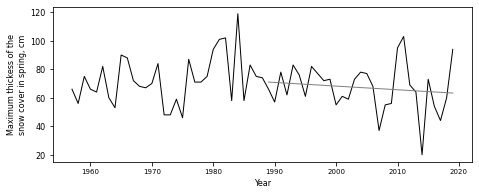

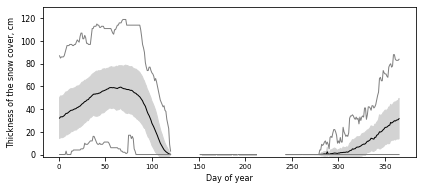

In [6]:
f = "meteo_daily_1952-2020_1.csv"

df = prepare(os.path.join(work_dir, f))
df.set_index("DATE_TIME", inplace=True)

df = df.loc[df.index.month < 6]
df = df.resample("A")["SNOW_THICKNESS"].agg(["max"])
df["YEAR"] = df.index.year
# df = df.loc[df["YEAR"] > 1985]
df.dropna(inplace=True)
# print(df)

fig, ax = plt.subplots()
fig.set_size_inches(17 / 2.54, 7 / 2.54)

ax.plot(df["YEAR"], df["max"], color="k", linewidth=1, label="Thickness")

df = df.loc[df["YEAR"] > 1988]
df.dropna(inplace=True)
fit = np.polyfit(df["YEAR"], df["max"], 1)
fit_fn = np.poly1d(fit)
print("Trend eqn:", fit_fn)
df["predicted"] = df["YEAR"] * fit[0] + fit[1]
# print(df)

ax.plot(df["YEAR"], df["predicted"], color="grey", linewidth=1, label="Trend since 1988")
ax.set_ylabel("Maximum thickess of the\nsnow cover in spring, cm")
ax.set_xlabel("Year")

fig.tight_layout()

plt.savefig("test_03.png", dpi=300, transparent=False, facecolor="white")

###################

df = prepare(os.path.join(work_dir, f))
# df.set_index("DATE_TIME", inplace=True)

day_list, mean_list, upper_list, lower_list, max_list, min_list = calc_intra_annual(df, "SNOW_THICKNESS",
                                                                                            "SNOW_THICKNESS",
                                                                                            "SNOW_THICKNESS")

fig, ax2 = plt.subplots()
fig.set_size_inches(17 / 2.54, 7 / 2.54)

ax2.plot(day_list, mean_list, color="k", linewidth=1)
ax2.fill_between(day_list, upper_list, lower_list, color="lightgrey")
ax2.plot(day_list, max_list, color="grey", linewidth=1)
ax2.plot(day_list, min_list, color="grey", linewidth=1)
ax2.set_ylim([-2, 130])
    
ax2.set_xlabel("Day of year")
ax2.set_ylabel("Thickness of the snow cover, cm")

### Peat temperatures:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137866 entries, 0 to 137865
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   DATE_TIME  137866 non-null  datetime64[ns]
 1   DEPTH      137866 non-null  float64       
 2   PEAT_TEMP  137866 non-null  float64       
 3   OBS_TYPE   137866 non-null  object        
 4   SITE       137866 non-null  int64         
 5   QC         132 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160011 entries, 0 to 160010
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   DATE_TIME  160011 non-null  datetime64[ns]
 1   DEPTH      160011 non-null  int64         
 2   PEAT_TEMP  160011 non-null  float64       
 3   SITE       160011 non-null  int64         
 4   QC         53 non-null

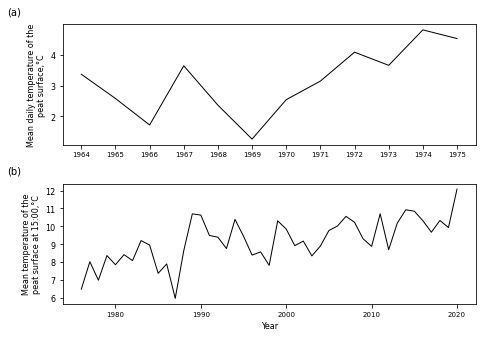

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(17 / 2.54, 12 / 2.54)

##### Daily series:
f = "peat-temp_daily_1960-2020.csv"

tmp = prepare(os.path.join(work_dir, f))
tmp.set_index("DATE_TIME", inplace=True)

tmp = tmp.loc[tmp["QC"] != 0]
tmp = tmp.loc[tmp["DEPTH"] == 0]
tmp = tmp.loc[tmp["OBS_TYPE"] == "avg"]
tmp = tmp.loc[tmp.index.year < 1976]  # 1976 is non-complete

for site in (1, ):  # site 2 was observed only during summertime, we won't use it
    df = tmp.loc[tmp["SITE"] == site]
    df = df.resample("A")["PEAT_TEMP"].agg(["mean"])
    # print(df)
    ax1.plot(df.index.year, df["mean"], color="k", linewidth=1, label="Site %s" % site)
    ax1.xaxis.set_ticks(np.arange(df.index.year.min(), df.index.year.max()+1, 1))

ax1.set_ylabel("Mean daily temperature of the\npeat surface,°C")
    
##### Hourly series:

f = "peat-temp_hourly_1976-2020.csv"

tmp = prepare(os.path.join(work_dir, f))
tmp.set_index("DATE_TIME", inplace=True)

tmp = tmp.loc[tmp["QC"] != 0]
tmp = tmp.loc[tmp["DEPTH"] == 0]
tmp = tmp.loc[tmp.index.hour == 15]

df = tmp.loc[tmp["SITE"] == 1]
# print(df)
df = df.resample("A")["PEAT_TEMP"].agg(["mean", "max"])
# print(df)
ax2.plot(df.index.year, df["mean"], color="k", linewidth=1)
# ax.plot(df.index.year, df["max"], color="k", linewidth=1, label="Site %s" % site)

ax2.set_ylabel("Mean temperature of the\npeat surface at 15:00,°C")
ax2.set_xlabel("Year")

ax1.text(-0.1, 1.15, "(a)", transform=ax1.transAxes, fontsize=MEDIUM_SIZE, va='top', ha='right')
ax2.text(-0.1, 1.15, "(b)", transform=ax2.transAxes, fontsize=MEDIUM_SIZE, va='top', ha='right')

fig.tight_layout()

plt.savefig("test_04.png", dpi=300, transparent=False, facecolor="white")

fit = np.polyfit(df.index.year, df["mean"], 1)
fit_fn = np.poly1d(fit)
print("Trend eqn:", fit_fn)

### Freezing of the peat surface:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7716 entries, 0 to 7715
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE_TIME         7716 non-null   datetime64[ns]
 1   FROZEN_CM         7573 non-null   float64       
 2   THAW_CM           883 non-null    float64       
 3   WATER_CONTENT_CM  5992 non-null   object        
 4   SNOW_COVER_CM     6336 non-null   object        
 5   TERRAIN           7716 non-null   int64         
 6   SITE              7716 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 422.1+ KB
Site: скв.105
[1 0]
Site: скв.107а
[1 0 3 2]
Site: скв.108
[1 0]
Site: уч.4
[1 0 2 3]
Site: скв.103
[0 1]
Site: 106
[1 0]


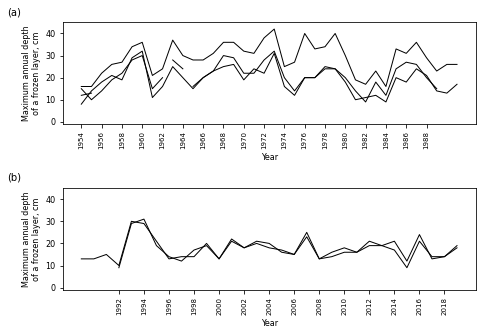

In [8]:
f = "1954-2019_thaw.csv"

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(17 / 2.54, 12 / 2.54)

tmp = prepare(os.path.join(work_dir, f))
tmp.set_index("DATE_TIME", inplace=True)
tmp.sort_index(inplace=True)

sites = tmp["SITE"].unique()
# print(sites)

for site in sites:
    print("Site:", site)
    df = tmp.loc[tmp["SITE"] == site]
    t = df["TERRAIN"].unique()
    print(t)
    df = df.loc[df["TERRAIN"] == 1]
    df = df.resample("A")["FROZEN_CM"].agg(["max"])
    if site == "скв.108" or site == "скв.105" or site == "скв.107а" or site == "уч.4":  # OH, NO! the series is interrupted after 1991!
        ax1.plot(df.index.year, df["max"], color="k", linewidth=1)
        ax1.xaxis.set_ticks(np.arange(df.index.year.min(), df.index.year.max()+1, 2))
    if site == "скв.103" or site == "106":
        ax2.plot(df.index.year, df["max"], color="k", linewidth=1)
        ax2.xaxis.set_ticks(np.arange(df.index.year.min(), df.index.year.max()+1, 2))
        
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

for ax in (ax1, ax2):
    ax.set_ylim([-1, 45])

    ax.set_ylabel("Maximum annual depth\nof a frozen layer, cm")
    ax.set_xlabel("Year")

ax1.text(-0.1, 1.15, "(a)", transform=ax1.transAxes, fontsize=MEDIUM_SIZE, va='top', ha='right')
ax2.text(-0.1, 1.15, "(b)", transform=ax2.transAxes, fontsize=MEDIUM_SIZE, va='top', ha='right')

fig.tight_layout()

plt.savefig("test_05.png", dpi=300, transparent=False, facecolor="white")

### Evapotranspiration:

/home/antonv/data/essd/PREP/READY_V2/evaporation_10d_1956-2020.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE_TIME  1479 non-null   datetime64[ns]
 1   END_DATE   1479 non-null   object        
 2   DAYS       1479 non-null   int64         
 3   SITE       1479 non-null   float64       
 4   ET         1479 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 57.9+ KB


<ipython-input-9-ef95ab8197f6>:65: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(np.linspace(9, 33, num=len(months)), months)


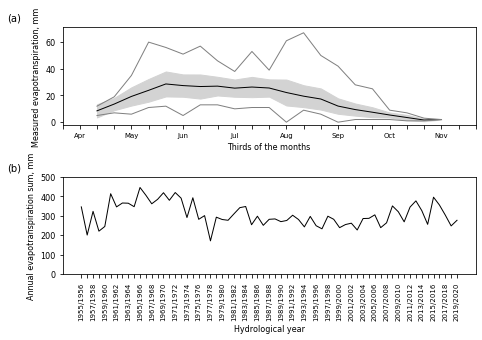

In [9]:
f = "evaporation_10d_1956-2020.csv"
print(os.path.join(work_dir, f))

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(17 / 2.54, 12 / 2.54)

tmp = prepare(os.path.join(work_dir, f))

tmp.set_index("DATE_TIME", inplace=True)
tmp.sort_index(inplace=True)

df = tmp.loc[tmp["SITE"] == 1]  # the longest time series

# INTRA_ANNUAL VARIABILITY:

df["MONTH"] = df.index.month
# getting the number of a 10-day period of a month:
df["D"] = 1
df.loc[df.index.day > 10, "D"] = 2
df.loc[df.index.day > 20, "D"] = 3
df["10d"] = (df["MONTH"] - 1) * 3 + df["D"]  # number of a 10-day period within a year
# print(df)

mean_list = []
std_list = []
max_list = []
min_list = []
day_list = []

for i in range(1, 37):  # there are 36 10-day period in a year
    df_d = df.loc[df["10d"] == i]
    
    if not df_d.empty:
        # print(df_d)
        mean_et = df_d["ET"].mean()
        std_et = df_d["ET"].std()
        max_et = df_d["ET"].max()
        min_et = df_d["ET"].min()
    else:
        mean_et = np.nan
        std_et = np.nan
        max_et = np.nan
        min_et = np.nan
        
    mean_list.append(mean_et)
    std_list.append(std_et)
    max_list.append(max_et)
    min_list.append(min_et)
    day_list.append(i)

upper_list = [sum(x) for x in zip(mean_list, std_list)]
lower_list = [x[0] - x[1] for x in zip(mean_list, std_list)]
    
ax1.plot(day_list, mean_list, color="k", linewidth=1)
ax1.fill_between(day_list, upper_list, lower_list, color="lightgrey")
ax1.plot(day_list, max_list, color="grey", linewidth=1)
ax1.plot(day_list, min_list, color="grey", linewidth=1)
ax1.set_ylim([-2, 71])

ax1.set_xlim([9, 33])
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
months = ["", 'Apr', "", "", 'May', "", "", 'Jun',"", "",  'Jul',"", "",  'Aug',"", "",  'Sep',"", "",  'Oct',"", "",  'Nov', "", ""]
plt.sca(ax1)
plt.xticks(np.linspace(9, 33, num=len(months)), months)
ax1.set_xticks(np.linspace(9, 33, num=len(months)), months)

ax1.set_xlabel("Thirds of the months")
ax1.set_ylabel("Measured evapotranspiration, mm")
# ax1.text(-0.14, 1.15, "(a)", transform=ax1.transAxes, fontsize=MEDIUM_SIZE, va='top', ha='right')    

# INTER-ANNUAL VARIABILITY:
df = df.resample("A")["ET"].agg(["sum"])

df["HYDRO_YEAR"] = (df.index.year - 1).astype(str) + "/" + df.index.year.astype(str)
# print(df)

ax2.plot(df["HYDRO_YEAR"], df["sum"], color="k", linewidth=1)
ax2.set_ylim([-2, 500])
ax2.set_xlabel("Hydrological year")
ax2.set_ylabel("Annual evapotranspiration sum, mm")
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
for tick in ax2.get_xticklabels()[1::2]:
    tick.set_visible(False)

ax1.text(-0.1, 1.15, "(a)", transform=ax1.transAxes, fontsize=MEDIUM_SIZE, va='top', ha='right')
ax2.text(-0.1, 1.15, "(b)", transform=ax2.transAxes, fontsize=MEDIUM_SIZE, va='top', ha='right')

fig.tight_layout()

plt.savefig("test_06.png", dpi=300, transparent=False, facecolor="white")
